In [7]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [8]:
df=pd.read_csv('concretedataset.csv')

In [9]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
df.shape

(1030, 9)

In [11]:
df['Concrete compressive strength']=df.Concrete compressive strength

SyntaxError: invalid syntax (<ipython-input-11-720d8425ba0e>, line 1)

In [12]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength                            float64
dtype: object

In [13]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength'],
      dtype='object')

In [14]:
df.describe

<bound method NDFrame.describe of       Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                     

In [15]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength                            0
dtype: int64

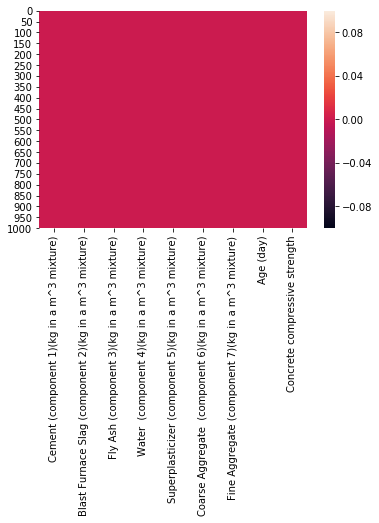

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Cement (component 1)(kg in a m^3 mixture)                   AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Fly Ash (component 3)(kg in a m^3 mixture)               AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Water  (component 4)(kg in a m^3 mixture)                AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Superplasticizer (component 5)(kg in a m^3 mixture)      AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Fine Aggregate (component 7)(kg in a m^3 mixture)        AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Age (day)                                                      AxesSubplot(0.125,0.125;0.0945122x0.343182)
Concrete compressive strength                               AxesSubplot(0.238415,0.125;0.0945122x0.343182)
dtype: object

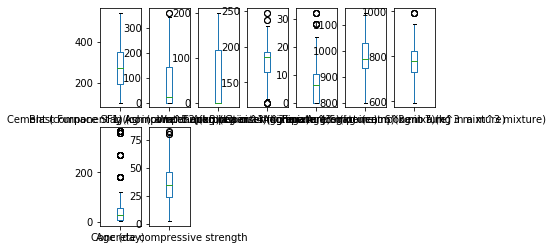

In [18]:
df.plot(kind='box',subplots=True,layout=(2,7))

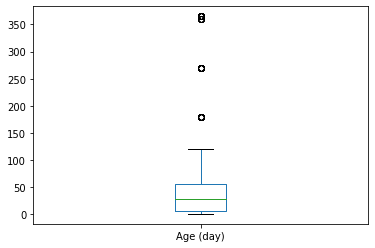

In [19]:
df['Age (day)'].plot.box()

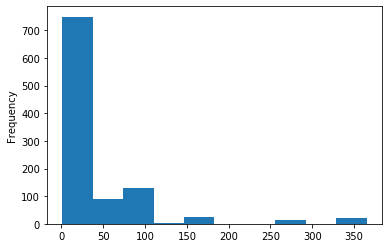

In [20]:
df['Age (day)'].plot.hist()

In [21]:
from scipy.stats import boxcox
df['Age (day)']=boxcox(df['Age (day)'],0)

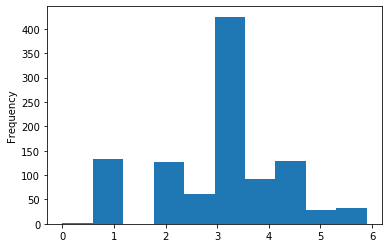

In [22]:
df['Age (day)'].plot.hist()

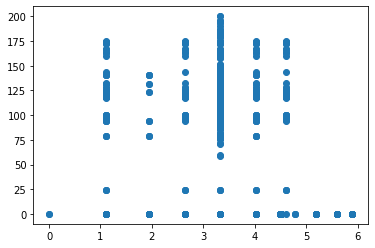

In [23]:
plt.scatter(df['Age (day)'],df['Fly Ash (component 3)(kg in a m^3 mixture)'])

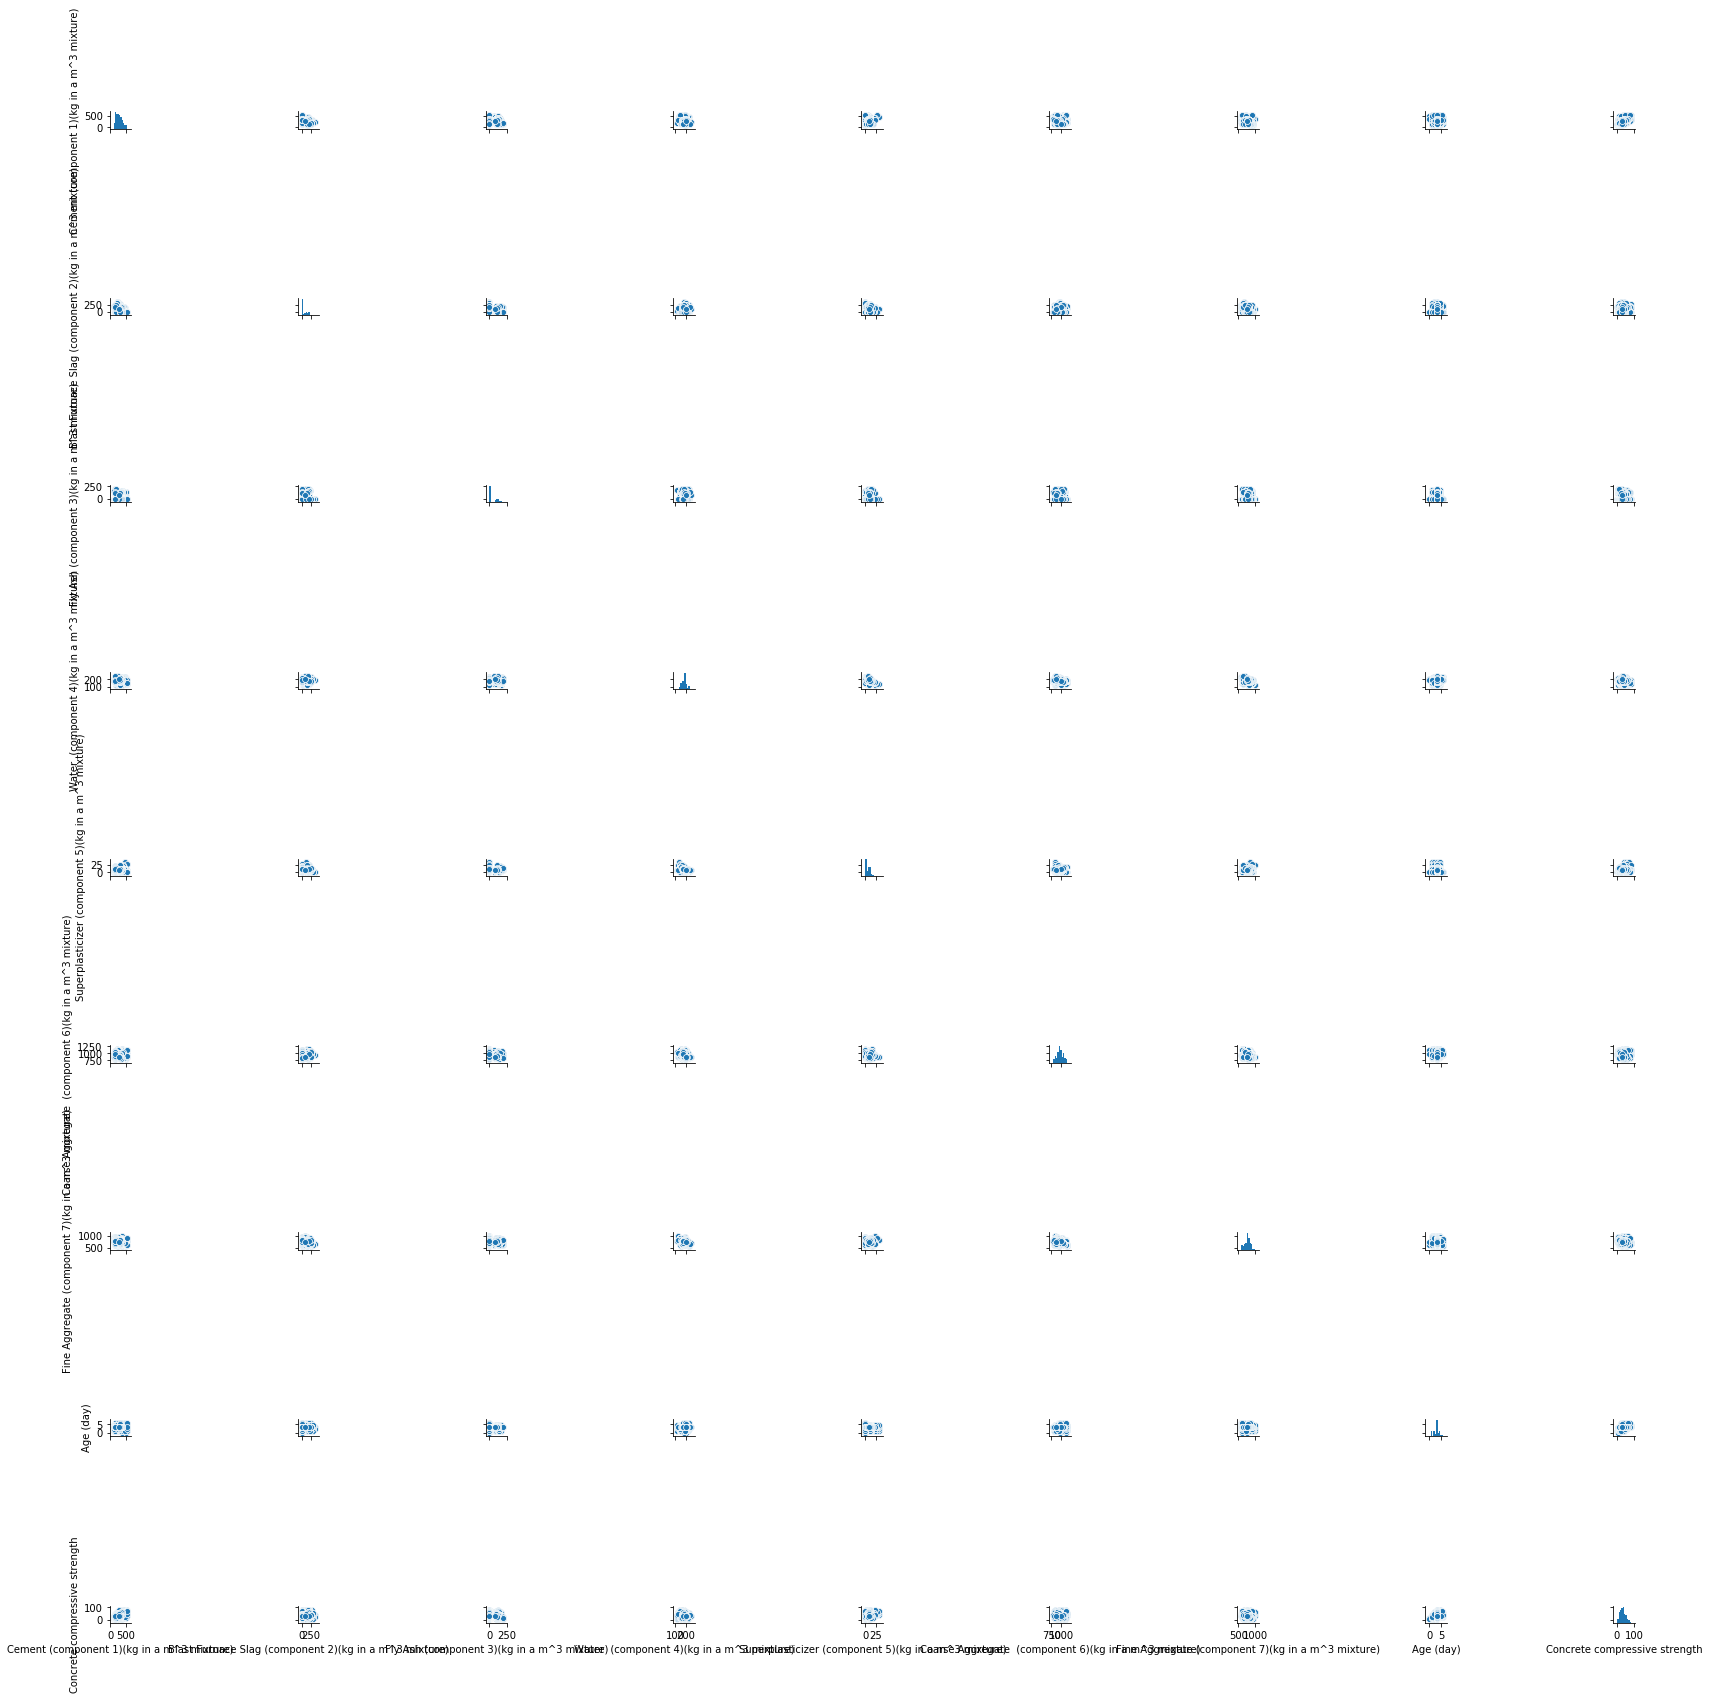

In [24]:
sns.pairplot(df)

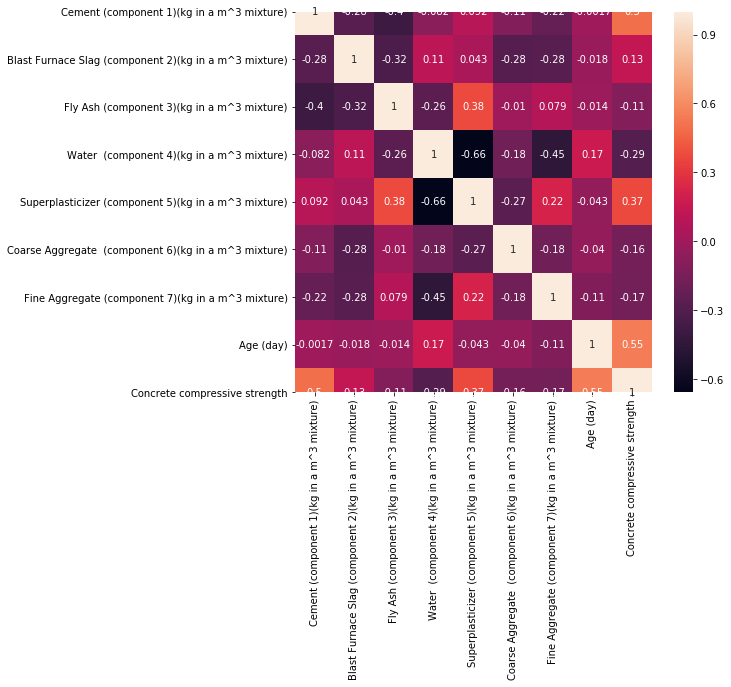

In [25]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [26]:
df.drop('Fly Ash (component 3)(kg in a m^3 mixture)',axis=1,inplace=True)

In [27]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),Concrete compressive strength
0,540.0,0.0,162.0,2.5,1040.0,676.0,3.332205,79.99
1,540.0,0.0,162.0,2.5,1055.0,676.0,3.332205,61.89
2,332.5,142.5,228.0,0.0,932.0,594.0,5.598422,40.27
3,332.5,142.5,228.0,0.0,932.0,594.0,5.899897,41.05
4,198.6,132.4,192.0,0.0,978.4,825.5,5.886104,44.30


In [28]:
x=df.iloc[:,0:-1]
x.head()



,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,162.0,2.5,1040.0,676.0,3.332205
1,540.0,0.0,162.0,2.5,1055.0,676.0,3.332205
2,332.5,142.5,228.0,0.0,932.0,594.0,5.598422
3,332.5,142.5,228.0,0.0,932.0,594.0,5.899897
4,198.6,132.4,192.0,0.0,978.4,825.5,5.886104


In [29]:
y=df.iloc[:,-1]
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete compressive strength, dtype: float64

In [30]:
x.shape



(1030, 7)

In [31]:
y.shape

(1030,)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=33,random_state=4)

In [33]:
x_train.shape


(997, 7)

In [34]:
y_train.shape


(997,)

In [35]:
x_test.shape



(33, 7)

In [36]:
y_test.shape

(33,)

In [37]:
lm=LinearRegression()

In [38]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
lm.coef_


array([ 0.07875644,  0.05066033, -0.31609013,  0.20183608, -0.01964031,
       -0.02715627,  8.54027335])

In [40]:
lm.intercept_


79.10803632358426

In [41]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength'],
      dtype='object')

In [42]:
lm.score(x_train,y_train)

0.7994041888504767

In [43]:
lm.intercept_

79.10803632358426

In [44]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength'],
      dtype='object')

In [45]:
lm.score(x_train,y_train)

0.7994041888504767

In [46]:
pred=lm.predict(x_test)
print("Predicted result price:",pred)
print("actual price",y_test)

Predicted result price: [42.85302969 51.45943909 31.72902141 41.48777186 45.74868629 41.83936243
 52.24751527 28.06858226 62.95531569 23.45023811 16.26496398 51.69334692
 34.49318113 32.23146288 38.10125057 59.07097024 23.9943035  33.60231425
 19.93445566 35.11247712 42.7516407  40.9096438  43.41844762 35.77011651
  7.16792004 42.21036869 12.88285646 14.31668392 39.17118291 42.94699017
 35.59872731 31.63820208 37.82057861]
actual price 522     44.52
701     50.53
563     21.82
678     38.80
98      55.60
906     39.42
381     81.75
634     24.50
405     69.84
989     19.99
781     14.20
47      40.76
802     31.65
92      24.10
306     48.28
908     44.52
211     24.48
829     37.17
599     20.97
538     34.57
1023    39.46
293     48.67
110     38.00
843     44.61
517     15.07
958     49.77
408     20.73
409     14.94
283     44.21
730     39.38
1022    41.54
650     33.19
253     42.35
Name: Concrete compressive strength, dtype: float64


In [47]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 5.911658929022862
Root Mean Squared Error: 8.050201499849997


In [48]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7106815834048262


In [49]:
t=np.array([45,60,60,12,64,54,32])

In [50]:
t.shape

(7,)

In [51]:
t=t.reshape(1,-1)

In [52]:
t.shape

(1, 7)

In [53]:
lm.predict(t)

array([339.71365026])

In [54]:
lm.predict(t)


array([339.71365026])

In [55]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.7967012433098242

In [56]:
ls.score(x_train,y_train)

0.7967012433098242

ValueError: shape mismatch: objects cannot be broadcast to a single shape

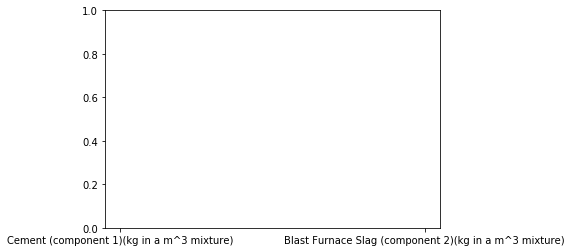

In [64]:
plt.bar()
plt.show()